In [50]:
import matplotlib.pyplot as plt
import numpy as np
import math

from mpl_toolkits.mplot3d import Axes3D

In [144]:
def generateHydroPhoneSignal(freq, toa):
    #freq is assumed to be sent in kHz
    pulseLength = 4e-3
    fs = 2.0*freq*1000.0
    step = (pulseLength - 0)/fs
    time = np.arange(toa,toa+pulseLength,step)
    y = [np.sin(2*np.pi*freq*1000*t) + 2 for t in time]
    
    plt.plot(time,y)
    plt.show()
    
    return y

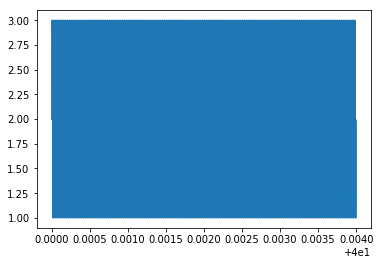

In [145]:
signal = generateHydroPhoneSignal(40,40)

In [34]:
def timeOfArrival(distTravelled):
    sos = 1500.0 # speed in m/s
    t = distTravelled/sos
    return t
    

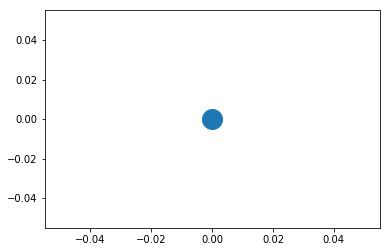

In [46]:
# Assume that the hydrophone is at some origin
plt.plot(0,0,marker="o", markersize=20)
plt.show()

In [152]:
def hydroPhoneArrayPosition(rotate = 0.0, start_pos = np.array([[10],[10]]), axis = 'x'):
    # Spacing between the hydrophones
    d = 0.018
    
    # The starting position is of the middle hydrophone, i.e. hydrophone2
    hydrophone2 = start_pos
    x = start_pos[0][0]
    y = start_pos[1][0]
    
    if axis == 'x':
        hydrophone1 = np.array([[x-d],[y]])
        hydrophone3 = np.array([[x+d],[y]])
    elif axis == 'y':
        hydrophone1 = np.array([[x],[y-d]])
        hydrophone3 = np.array([[x],[y+d]])
    else:
        print("Error: Entered invalid value for the axis")
    
    # Assumed that the bearing is given in degrees convert to radians
    # Bearing is assumed to be CCW relative to axis
    rotate_rad = math.radians(rotate)
    R_z = np.array([[math.cos(rotate_rad), -1*math.sin(rotate_rad)],[math.sin(rotate_rad), math.cos(rotate_rad)]])
    
    hydrophone1_rotated = np.matmul(R_z,hydrophone1 - hydrophone2) + hydrophone2
    hydrophone2_rotated = hydrophone2
    hydrophone3_rotated = np.matmul(R_z,hydrophone3 - hydrophone2) + hydrophone2
    
    # Create array of X and Y for the plot
    hydrophone_x = [hydrophone1[0][0],hydrophone2[0][0],hydrophone3[0][0]]
    hydrophone_y = [hydrophone1[1][0],hydrophone2[1][0],hydrophone3[1][0]]
    
    hydrophoneRotated_x = [hydrophone1_rotated[0][0],hydrophone2_rotated[0][0],hydrophone3_rotated[0][0]]
    hydrophoneRotated_y = [hydrophone1_rotated[1][0],hydrophone2_rotated[1][0],hydrophone3_rotated[1][0]]
    # Assume that the hydrophone is at some origin
    plt.plot(0,0,marker="o", markersize=20)
    plt.plot(hydrophoneRotated_x,hydrophoneRotated_y,'go--')
    
    plt.plot(hydrophoneRotated_x[0],hydrophoneRotated_y[0],'ro')
    plt.plot(hydrophoneRotated_x[1],hydrophoneRotated_y[1],'go')
    plt.plot(hydrophoneRotated_x[2],hydrophoneRotated_y[2],'bo')
    plt.show()
    
    return [hydrophoneRotated_x, hydrophoneRotated_y]
    
    

In [222]:
def hydroPhoneTriArrayPosition(rotate = 0.0, centroid = np.array([[5],[5]]), d = 0.018):
    c_x = centroid[0][0]
    c_y = centroid[1][0]
    
    # All hydrophone positions determined relative the to the centroid
    hydrophone1 = np.array([[c_x],[c_y+(d/math.sqrt(3))]])
    hydrophone2 = np.array([[c_x + (d*0.5)],[c_y - (d/(math.sqrt(3)*2.0))]])
    hydrophone3 = np.array([[c_x - (d*0.5)],[c_y - (d/(math.sqrt(3)*2.0))]])
    
    rotate_rad = math.radians(rotate)
    R_z = np.array([[math.cos(rotate_rad), -1*math.sin(rotate_rad)],
                    [math.sin(rotate_rad), math.cos(rotate_rad)]])
    hydrophone1_rotated = np.matmul(R_z,hydrophone1 - centroid) + centroid
    hydrophone2_rotated = np.matmul(R_z,hydrophone2 - centroid) + centroid
    hydrophone3_rotated = np.matmul(R_z,hydrophone3 - centroid) + centroid
    
    hydrophone_x = [hydrophone1_rotated[0][0],hydrophone2_rotated[0][0],hydrophone3_rotated[0][0]]
    hydrophone_y = [hydrophone1_rotated[1][0],hydrophone2_rotated[1][0],hydrophone3_rotated[1][0]]
    return [hydrophone_x,hydrophone_y]
    
    

In [223]:
def plotHydrophoneArray(hydrophonePose):
    hydrophone_x = hydrophonePose[0]
    hydrophone_y = hydrophonePose[1]
    plt.plot(hydrophone_x[0],hydrophone_y[0],'ro',markerSize = 10)
    plt.plot(hydrophone_x[1],hydrophone_y[1],'go',markerSize = 10)
    plt.plot(hydrophone_x[2],hydrophone_y[2],'bo',markerSize = 10)
    plt.plot(hydrophone_x,hydrophone_y,'k--')
    plt.plot([hydrophone_x[0],hydrophone_x[-1]],[hydrophone_y[0],hydrophone_y[-1]],'k--')
    plt.show()

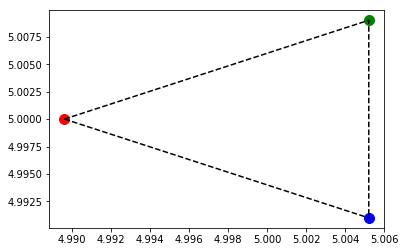

Dist between 1 and 2: 0.017999999999999853
Dist between 1 and 3: 0.017999999999999853
Dist between 2 and 3: 0.018000000000000682


In [225]:
result = hydroPhoneTriArrayPosition(rotate = 90)
plotHydrophoneArray(result)
determineDistBetweenPhones(result)

In [201]:
def determineDistBetweenPhones(hydrophonePose):
    x = hydrophonePose[0]
    y = hydrophonePose[1]
    
    start_1 = [x[0],y[0]]
    start_2 = [x[1],y[1]]
    end_2 = [x[1],y[1]]
    end_3 = [x[2],y[2]]
    
    print("Dist between 1 and 2: " + str(determineDist(start_1,end_2)))
    print("Dist between 1 and 3: " + str(determineDist(start_1,end_3)))
    print("Dist between 2 and 3: " + str(determineDist(start_2,end_3)))

In [199]:
def determineDist(start,end):
    return(math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2))

In [386]:
def determineBearing(hydrophone_toa, d=0.018):
    t1 = hydrophone_toa[0] #TOA for hydrophone 1
    t2 = hydrophone_toa[1] #TOA for hydrophone 2
    t3 = hydrophone_toa[2] #TOA for hydrophone 3
    
    s = 1500.0 #Speed of sound in salty waters
    
    #Simple cases
    if t1>t2 and t1>t3 and t2==t3:
        return 180
    if t2>t3 and t2>t1 and t3==t1:
        return -90
    if t3>t1 and t3>t2 and t1==t2:
        return 90
    if t1>t3 and t2>t3 and t1==t2:
        return -120
    if t1>t2 and t3>t2 and t1==t3:
        return 120
    if t2>t1 and t3>t1 and t2==t3:
        return 0.0
    
    
    if t1<t2 and t1<t3:
        x1 = s*(t2-t1)
        x2 = s*(t3-t1)
        
        theta1 = math.degrees(math.acos(x1/d))
        theta2 = math.degrees(math.acos(x2/d))
        
        bearing1 = theta1 - 30.0
        bearing2 = 30.0 - theta2
        print("I am here")
        print(bearing1)
        print(bearing2)
        
        if bearing1 > 0 and bearing2 > 0:
            return max(bearing1,bearing2)
        else:
            return min(bearing1,bearing2)
    
    if t2<t1 and t2<t3:
        x1 = s*(t3-t2)
        x2 = s*(t1-t2)
        
        theta1 = math.degrees(math.acos(x1/d))
        theta2 = math.degrees(math.acos(x2/d))
        
        bearing1 = theta1 - 30.0
        bearing2 = 30.0 - theta2
        print(bearing1)
        print(bearing2)
        if bearing1 > 0 and bearing2 > 0:
            return max(bearing1,bearing2) - 120
        else:
            return min(bearing1,bearing2) + 120
    
    if t3<t1 and t3<t2:
        x1 = s*(t1-t3)
        x2 = s*(t2-t3)
        
        theta1 = math.degrees(math.acos(x1/d))
        theta2 = math.degrees(math.acos(x2/d))
        
        bearing1 = theta1 - 30.0
        bearing2 = 30.0 - theta2
        print(bearing1)
        print(bearing2)
        if bearing1 > 0 and bearing2 > 0:
            return max(bearing1,bearing2) + 120
        else:
            return min(bearing1,bearing2) - 120

In [389]:
def main():
    freq = 40 # Frequency of emitter in kHz
    emitter = [0.0,0.0] # Starting position of the emitting pinger
    centroid = np.array([[-0.05],[0.05]])
    init_rotate = -90
    hydrophonePose = hydroPhoneTriArrayPosition(rotate = init_rotate,centroid = centroid)
    plt.plot(emitter[0],emitter[1],marker="o", markersize=20)
    plotHydrophoneArray(hydrophonePose)
    
    hydrophone_x = hydrophonePose[0]
    hydrophone_y = hydrophonePose[1]
    dist_to_hydrophone1 = determineDist(emitter,[hydrophonePose[0][0],hydrophonePose[1][0]])
    dist_to_hydrophone2 = determineDist(emitter,[hydrophonePose[0][1],hydrophonePose[1][1]])
    dist_to_hydrophone3 = determineDist(emitter,[hydrophonePose[0][2],hydrophonePose[1][2]])
    
    hydrophone1_toa = timeOfArrival(dist_to_hydrophone1)
    hydrophone2_toa = timeOfArrival(dist_to_hydrophone2)
    hydrophone3_toa = timeOfArrival(dist_to_hydrophone3)
    
    hydrophone_toa = [hydrophone1_toa,hydrophone2_toa,hydrophone3_toa]
    bearing = determineBearing(hydrophone_toa)
    print(bearing)
    
    hydrophonePose = hydroPhoneTriArrayPosition(rotate=(-1*bearing)+init_rotate, centroid=centroid)
    plt.plot(emitter[0],emitter[1],marker="o", markersize=20)
    plotHydrophoneArray(hydrophonePose)
    

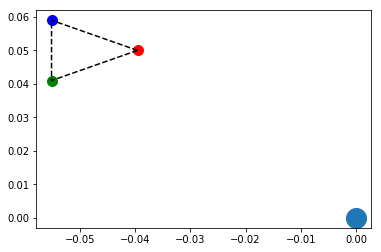

I am here
43.969280017201754
10.877356224687905
43.969280017201754


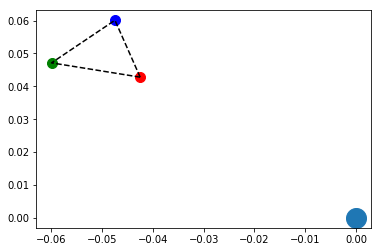

In [390]:
main()